In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as sts
import numpy as np
import datetime as dt


In [2]:
#files to load
city_data_to_load= os.path.join("Resources", "city_data.csv")
city_data_df= pd.read_csv(city_data_to_load)
ride_data_to_load= os.path.join("Resources", "ride_data.csv")
ride_data_df= pd.read_csv(ride_data_to_load)

In [3]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how= "left", on= ["city", "city"])

In [4]:
total_rides= pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers= pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_fares= pyber_data_df.groupby(["type"]).sum()["fare"]

In [5]:
avg_fare_ride= total_fares/total_rides
avg_fare_driver= total_fares/total_drivers

In [6]:
per_city_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_ride,
    "Average Fare per Driver": avg_fare_driver
})

In [7]:
per_city_summary_df["Total Fares"]= per_city_summary_df["Total Fares"].map("${:,.2f}".format)

In [8]:
per_city_summary_df["Average Fare per Ride"]=per_city_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

In [9]:
per_city_summary_df["Average Fare per Driver"]= per_city_summary_df["Average Fare per Driver"].map("${:.2f}".format)

In [10]:
per_city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [11]:
per_city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [12]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df= pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]== "Rural"]

In [13]:
pyber_data_df= pyber_data_df.rename(columns={'city':'City', 'date':'date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [14]:
pyber_data_df

,City,date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [15]:
pyber_data_df["Date"]= pd.to_datetime(pyber_data_df[("date")])

In [16]:
pyber_data_df= pyber_data_df.set_index("Date")

In [17]:
new_df=pyber_data_df[['City Type','Fare']].copy()

In [18]:
new_df=pd.DataFrame(new_df.groupby(['Date','City Type']).sum()['Fare'])

In [19]:
new_df= new_df.reset_index()

In [20]:
new_df= pd.pivot_table(new_df, values='Fare', index= "Date", columns=['City Type'])

In [21]:
corrected_df= new_df.loc['2019-01-01':'2019-04-28']

In [26]:
plot_data= corrected_df.resample("W").sum()
plot_data.reset_index()["Date"]

0    2019-01-06
1    2019-01-13
2    2019-01-20
3    2019-01-27
4    2019-02-03
5    2019-02-10
6    2019-02-17
7    2019-02-24
8    2019-03-03
9    2019-03-10
10   2019-03-17
11   2019-03-24
12   2019-03-31
13   2019-04-07
14   2019-04-14
15   2019-04-21
16   2019-04-28
Name: Date, dtype: datetime64[ns]

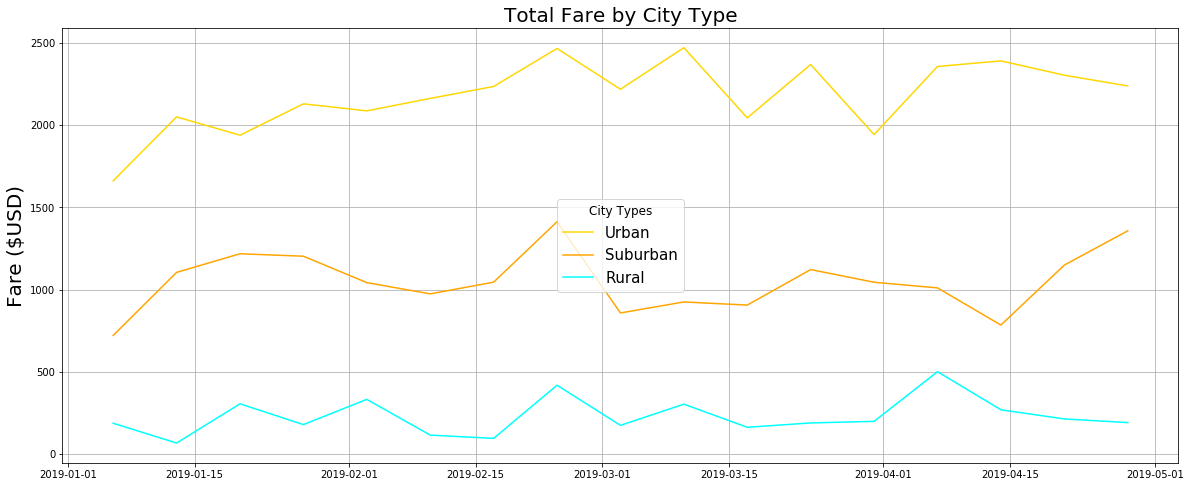

In [28]:
x_values= plot_data.reset_index()["Date"]

plt.figure(figsize=(20,8))

plt.plot(x_values, plot_data["Urban"], c= "gold", label= "Urban")

plt.plot(x_values, plot_data["Suburban"], c= "orange", label= "Suburban")

plt.plot(x_values, plot_data["Rural"], c= "cyan", label="Rural")


x_month= ["Jan", "Feb", "Mar", "Apr"]
#incorporate the graph properties
plt.title("Total Fare by City Type", fontsize="20")
plt.xlabel= ("x_month")
plt.ylabel("Fare ($USD)", fontsize="20")
plt.grid()

lgnd = plt.legend(fontsize="15", mode="Expanded",
    loc="center", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("Analysis/Fig8.png")